<a href="https://colab.research.google.com/github/smraytech/test/blob/main/Flight_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📌 1. Import Libraries & Set Up Environment

In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# To display all columns
pd.set_option('display.max_columns', None)

📁 2. Load the Dataset

In [2]:
# Load the CSV file
df = pd.read_csv('/content/air_traffic_data.csv')

# Quick preview
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


🧹 3. Initial Data Exploration

In [4]:
# Shape and data types
print("Shape:", df.shape)
print("Columns and types:\n", df.dtypes)

Shape: (15007, 16)
Columns and types:
 Activity Period                 int64
Operating Airline              object
Operating Airline IATA Code    object
Published Airline              object
Published Airline IATA Code    object
GEO Summary                    object
GEO Region                     object
Activity Type Code             object
Price Category Code            object
Terminal                       object
Boarding Area                  object
Passenger Count                 int64
Adjusted Activity Type Code    object
Adjusted Passenger Count        int64
Year                            int64
Month                          object
dtype: object


In [5]:
# Check for nulls
df.isnull().sum()

,0
Activity Period,0
Operating Airline,0
Operating Airline IATA Code,54
Published Airline,0
Published Airline IATA Code,54
GEO Summary,0
GEO Region,0
Activity Type Code,0
Price Category Code,0
Terminal,0


In [6]:
# Summary statistics
df.describe(include='all')

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
count,15007.000000,15007,14953,15007,14953,15007,15007,15007,15007,15007,15007,15007.000000,15007,15007.000000,15007.000000,15007
unique,NaN,77,73,68,64,2,9,3,2,5,8,NaN,3,NaN,NaN,12
top,NaN,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,US,Deplaned,Other,International,A,NaN,Deplaned,NaN,NaN,August
freq,NaN,2154,3046,2645,3752,9210,5797,7071,13087,9197,5225,NaN,7071,NaN,NaN,1310
mean,201045.073366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29240.521090,NaN,29331.917105,2010.385220,NaN
std,313.336196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58319.509284,NaN,58284.182219,3.137589,NaN
min,200507.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,2005.000000,NaN
25%,200803.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5373.500000,NaN,5495.500000,2008.000000,NaN
50%,201011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9210.000000,NaN,9354.000000,2010.000000,NaN
75%,201308.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21158.500000,NaN,21182.000000,2013.000000,NaN


🛠️ 4. Data Cleaning & Feature Engineering

In [8]:
# Convert 'Activity Period' to datetime
df['Activity Period'] = df['Activity Period'].astype(str)
df['Year'] = df['Activity Period'].str[:4]
df['Month'] = df['Activity Period'].str[4:]
df['Date'] = pd.to_datetime(df['Year'] + '-' + df['Month'] + '-01')

In [9]:
# Drop irrelevant or redundant columns (if any)
columns_to_drop = ['GEO Region', 'Terminal', 'Boarding Area', 'Operating Airline IATA Code']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

In [10]:
# Rename columns for clarity
df.rename(columns={
    'Operating Airline': 'Airline',
    'Passenger Count': 'Passengers'
}, inplace=True)

*   📊 5. Exploratory Data Analysis (EDA)
*   A. 🕒 Passenger Trend Over Time

/tmp/ipython-input-11-112988310.py:8: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


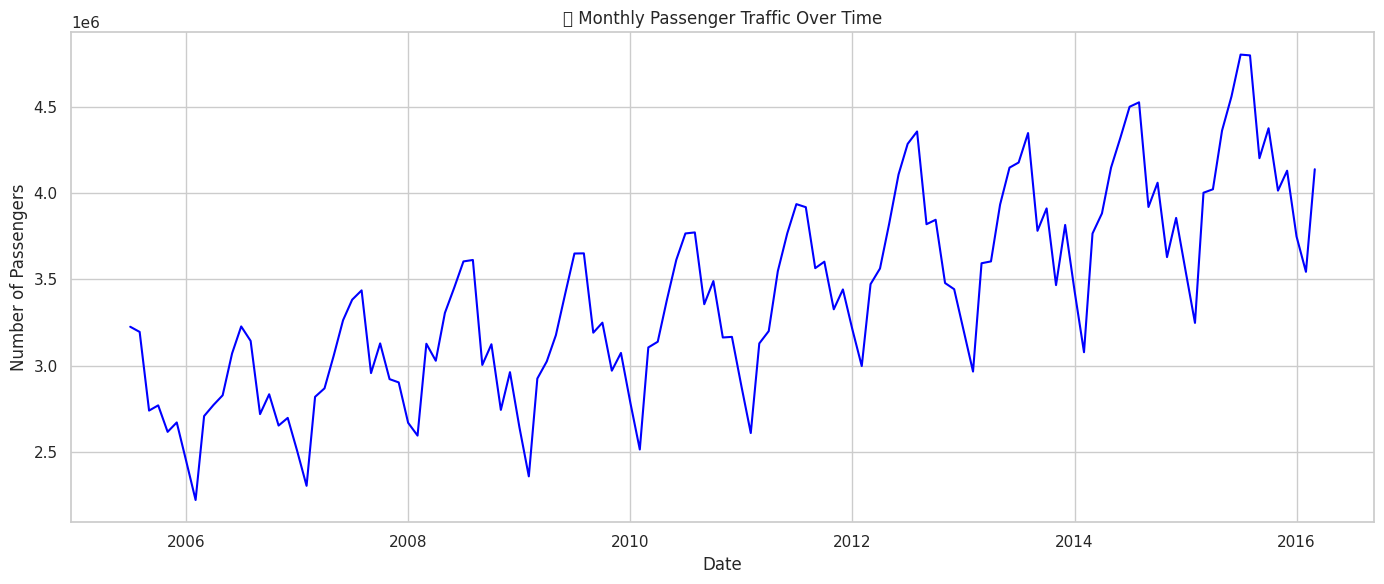

In [11]:
monthly_trend = df.groupby('Date')['Passengers'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='Passengers', data=monthly_trend, color='blue')
plt.title('📈 Monthly Passenger Traffic Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.tight_layout()
plt.show()

B. 🛫 Top 10 Airlines by Total Passengers

/tmp/ipython-input-12-1464622091.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_airlines.values, y=top_airlines.index, palette='viridis')
/tmp/ipython-input-12-1464622091.py:8: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


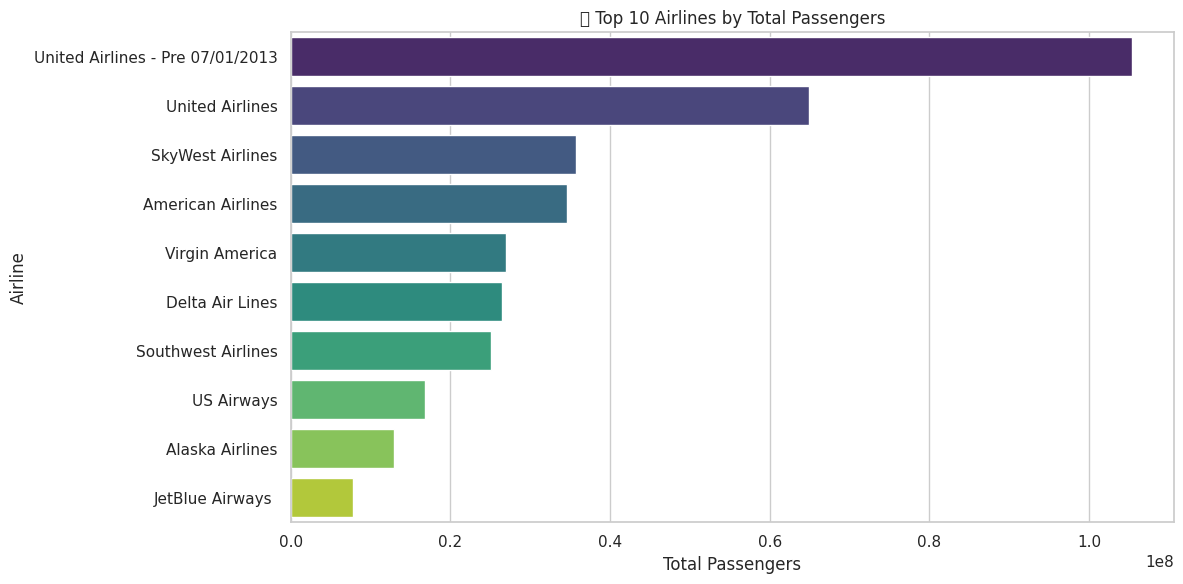

In [12]:
top_airlines = df.groupby('Airline')['Passengers'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_airlines.values, y=top_airlines.index, palette='viridis')
plt.title('🏆 Top 10 Airlines by Total Passengers')
plt.xlabel('Total Passengers')
plt.ylabel('Airline')
plt.tight_layout()
plt.show()

C. 📅 Seasonality Check (Passengers by Month)

/tmp/ipython-input-13-2874727083.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Passengers', data=monthly_avg, palette='coolwarm')
/tmp/ipython-input-13-2874727083.py:7: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


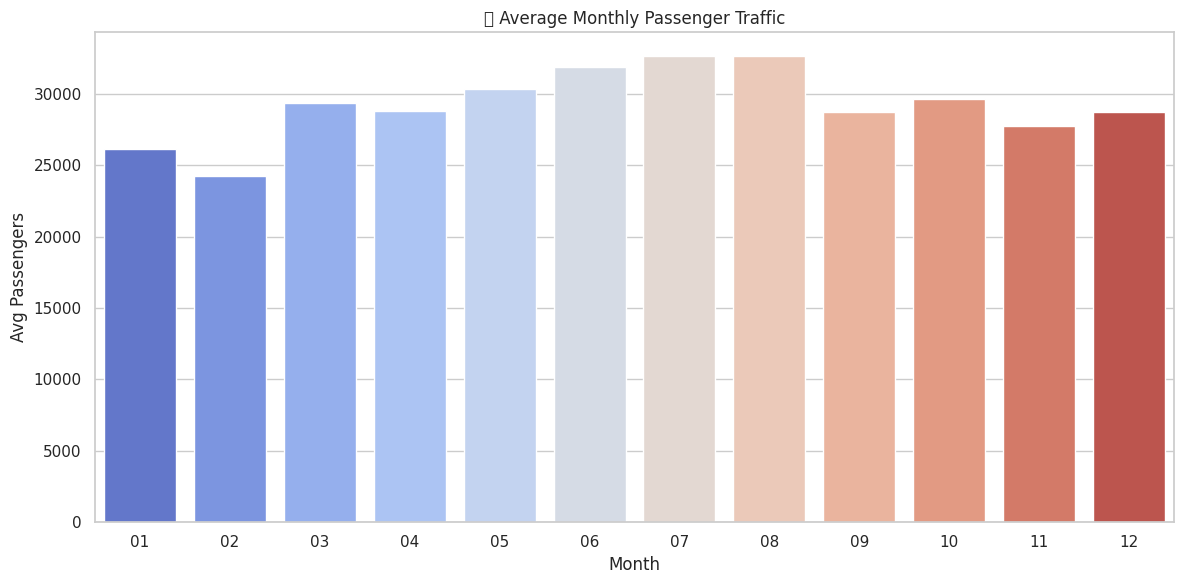

In [13]:
monthly_avg = df.groupby('Month')['Passengers'].mean().reset_index()

sns.barplot(x='Month', y='Passengers', data=monthly_avg, palette='coolwarm')
plt.title('📆 Average Monthly Passenger Traffic')
plt.xlabel('Month')
plt.ylabel('Avg Passengers')
plt.tight_layout()
plt.show()

*   📈 6. Dashboards / Aggregated Views for Stakeholders

*   A. Summary Table by Airline



In [14]:
airline_summary = df.groupby('Airline')['Passengers'].agg(['sum', 'mean', 'count']).reset_index()
airline_summary.columns = ['Airline', 'Total Passengers', 'Average per Record', 'Flight Entries']
airline_summary.sort_values(by='Total Passengers', ascending=False).head(10)

,Airline,Total Passengers,Average per Record,Flight Entries
70,United Airlines - Pre 07/01/2013,105363917,48915.467502,2154
69,United Airlines,64876996,72732.058296,892
60,SkyWest Airlines,35711737,37083.839045,963
14,American Airlines,34588714,127164.389706,272
71,Virgin America,26934738,74405.353591,362
29,Delta Air Lines,26440420,68498.497409,386
61,Southwest Airlines,25087141,81188.158576,309
68,US Airways,16816616,55317.815789,304
11,Alaska Airlines,12955980,17251.637816,751
42,JetBlue Airways,7827973,35261.139640,222


B. Export Summary for Dashboard

In [19]:
# Export CSV for stakeholders to load into Excel/Power BI/Tableau
load_into_Excel = airline_summary.to_csv('/content/airline_summary_export.csv', index=False)

In [20]:
print(airline_summary.head())  # See first few rows

        Airline  Total Passengers  Average per Record  Flight Entries
0  ATA Airlines            384764         8744.636364              44
1    Aer Lingus            431904         4407.183673              98
2    Aeromexico            983488         5463.822222             180
3    Air Berlin             83547         2320.750000              36
4   Air Canada            6680071        18251.560109             366


In [21]:
from IPython.display import display
display(airline_summary)

,Airline,Total Passengers,Average per Record,Flight Entries
0,ATA Airlines,384764,8744.636364,44
1,Aer Lingus,431904,4407.183673,98
2,Aeromexico,983488,5463.822222,180
3,Air Berlin,83547,2320.750000,36
4,Air Canada,6680071,18251.560109,366
...,...,...,...,...
72,Virgin Atlantic,2540553,9847.104651,258
73,WestJet Airlines,549830,5338.155340,103
74,World Airways,785,261.666667,3
75,XL Airways France,68918,2223.161290,31


In [23]:
airline_summary.to_csv('/content/airline_summary_export.csv', index=False)

In [25]:
from google.colab import files
files.download('/content/airline_summary_export.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
from google.colab import files
files.download('/content/airline_summary_export.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

*   🔁 7. Build a Reusable Analysis Pipeline

*   Put your core analysis in a function for reusability and automation:

In [16]:
def run_passenger_analysis(df):
    df['Activity Period'] = df['Activity Period'].astype(str)
    df['Year'] = df['Activity Period'].str[:4]
    df['Month'] = df['Activity Period'].str[4:]
    df['Date'] = pd.to_datetime(df['Year'] + '-' + df['Month'] + '-01')

    monthly = df.groupby('Date')['Passengers'].sum().reset_index()
    top_airlines = df.groupby('Airline')['Passengers'].sum().sort_values(ascending=False).head(10)

    return monthly, top_airlines

# Run pipeline
monthly_data, top_airlines_data = run_passenger_analysis(df)